<a href="https://colab.research.google.com/github/SoumyaCO/Computer-Vision-Fashion-Mnist/blob/main/TF_cv_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Basics with MNIST FASHION data:

In [5]:
# importing the modules:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

#### Getting Fashion Mnist Data

In [3]:
data = keras.datasets.fashion_mnist

Calling the `load_data()` method will give us tuples of training and testing data. 

In [6]:
(images, labels), (test_images, test_labels) = data.load_data()

#### Showing the images:
... as an array and also as a image in matplotlib

LABEL 
:9
IMAGES 
:[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232

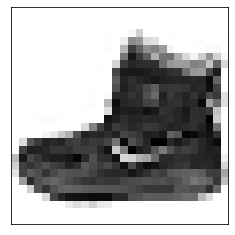

In [12]:
index = 0
np.set_printoptions(linewidth = 320)

print(f"LABEL \n:{labels[index]}")
print(f"IMAGES \n:{images[index]}")

plt.xticks([])
plt.yticks([])
plt.imshow(images[index], cmap = 'Greys')

#### Normalize the pixel values of the images:
... to get values bewteen 0 to 1, so that we can fed this to the neural network:

In [13]:
images = images / 255
test_images = test_images / 255

#### Building the model:

In [15]:
model = tf.keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dense(units = 10, activation = 'softmax')
])

### Compile the `model` with optimizers and loss function

In [19]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [36]:
class MyCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get('loss') < 0.4:
      print(f"\n loss is {logs.get('loss')}, so cancelling training")
      self.model.stop_training = True

callbacks = MyCallBack()
model.fit(images, labels, epochs = 5 , callbacks = [callbacks])

Epoch 1/5
1864/1875 [============================>.] - ETA: 0s - loss: 0.1859 - accuracy: 0.9303
 loss is 0.185764342546463, so cancelling training
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1858 - accuracy: 0.9304


In [35]:
loss, accuracy = model.evaluate(test_images, test_labels)

print(f"Accuracy: {accuracy*100:.0f}%")
print(f"loss: {loss*100:.0f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.3611 - accuracy: 0.8817
Accuracy: 88%
loss: 36%


When we'l find that a certain number of epochs is needed to get our desired accurasy or loss?

**Answer**: `Callbacks`